###House Price Prediction Problem**  

#### **Objective**  
The goal of this project is to **predict the sale prices of residential homes** based on their features (e.g., size, location, condition) using machine learning. This is a **supervised regression task** since the target variable "SalePrice" is continuous.  

#### **Dataset**  
- **Source**: [Kaggle Competition – House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)  
- **Training Data**: 1,460 houses with 80 features (numeric & categorical)
- **Test Data**: 1,459 houses (no "SalePrice"; used for final predictions).  

#### **Key Challenges**  (last mai karna add)
1. **Heterogeneous Features**(Mix of numeric and catagorical)
2. **Missing Values**  
3. **Skewed Target**
4. **Feature Correlation**

#### Real-World Impact**  
- Helps real estate agents price homes competitively.  
- Assists buyers/sellers in understanding fair market value.  
- Used by banks for mortgage valuation and risk assessment.  


### **Key Takeaways for Theory**  
- **Regression Problem**: Predict continuous values using structured data.  
- **Data Quality Matters**: Cleaning and EDA are critical before modeling.  
- **Domain Knowledge**: Understanding real estate features improves feature engineering.  


#Approach

### **1. Data Collection**
- **Sources**: CSV files, APIs, databases, web scraping.  
- **Validation**: Ensure data is **relevant**, **sufficient**, and **unbiased**.  


In [7]:
#loading the dataset
import pandas as pd
train=pd.read_csv('/content/Dataset.csv')

In [8]:
display(train.head())

,No,Property_Type,Land_Area,Floor_Area,Condition,View,Amenities,Furnishing_Status,Air_Conditioning (Yes/No),Heating (Yes/No),...,Location,Num_bathrooms,Num_rooms,Price,distance to nearest MRT Station,distance to nearest Hospital,distance to nearest School,distance to nearest Bus Stand,distance to nearest Airport,Crimerate in area
0,1,Condo,1784,1555,New,NaN,Basic,Fully Furnished,No,Yes,...,Phoenix,3.0,2.0,334126.0,7.06,11.83,3.54,2.67,45.83,9.9
1,2,Farmhouse,1768,1530,New,City View,Basic,Semi Furnished,No,Yes,...,San Francisco,2.0,3.0,1895788.0,3.96,14.28,1.02,1.21,21.99,7.7
2,3,Apartment,2667,2667,Old,Park Facing,Rooftop Access,Fully Furnished,Yes,No,...,Miami,2.0,3.0,4397494.0,14.08,0.92,4.94,0.62,11.06,5.3
3,4,Apartment,1262,1262,Old,City View,NaN,Semi Furnished,Yes,No,...,Chicago,3.0,4.0,1367842.0,14.17,14.21,7.13,0.39,43.88,8.9
4,5,Apartment,1720,1720,Renovated,City View,Parking,Semi Furnished,Yes,No,...,New York,4.0,6.0,1403758.0,6.09,8.50,7.16,4.56,40.70,8.2


In [9]:
#checking shapes
print("Train shape:", train.shape)



Train shape: (150804, 25)


In [10]:
#checking columns
print("Train columns:", train.columns.tolist())


Train columns: ['No', 'Property_Type', 'Land_Area', 'Floor_Area', 'Condition', 'View', 'Amenities', 'Furnishing_Status', 'Air_Conditioning (Yes/No)', 'Heating (Yes/No)', 'Kitchen_Type', 'Balcony (Yes/No)', 'Maintenance_Fees', 'Latitude', 'Longitude', 'Location', 'Num_bathrooms', 'Num_rooms', 'Price', 'distance to nearest MRT Station', 'distance to nearest Hospital', 'distance to nearest School', 'distance to nearest Bus Stand', 'distance to nearest Airport', 'Crimerate in area']


In [11]:
#checking missing values
print("Missing values in train:", train.isnull().sum())

#checking total missing values
print("Total Missing values in train:", train.isnull().sum().sum())



Missing values in train: No                                     0
Property_Type                          0
Land_Area                              0
Floor_Area                             0
Condition                              0
View                               43809
Amenities                          24412
Furnishing_Status                  11975
Air_Conditioning (Yes/No)              0
Heating (Yes/No)                       0
Kitchen_Type                       11975
Balcony (Yes/No)                       0
Maintenance_Fees                       0
Latitude                               0
Longitude                              1
Location                               1
Num_bathrooms                          1
Num_rooms                              1
Price                                  1
distance to nearest MRT Station        1
distance to nearest Hospital           1
distance to nearest School             1
distance to nearest Bus Stand          1
distance to nearest Airport     

In [12]:
#checking duplicate value
print("Duplicate rows in train:", train.duplicated().sum())


Duplicate rows in train: 0


### **2. Exploratory Data Analysis (EDA)**
- **Overview**: Check shape, info(), describe().  
- **Missing Values**: Visualize nulls and decide: drop or impute.  
- **Visualizations**:  
  - Histograms/KDE for target distribution.  
  - Boxplots for outliers.  
  - Scatterplots for feature-target relationships.  
  - Heatmap for correlations.  

In [13]:
# Basic stats for train
print("Train Data")
print(train.info())
print(train.describe())



Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150804 entries, 0 to 150803
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   No                               150804 non-null  int64  
 1   Property_Type                    150804 non-null  object 
 2   Land_Area                        150804 non-null  int64  
 3   Floor_Area                       150804 non-null  int64  
 4   Condition                        150804 non-null  object 
 5   View                             106995 non-null  object 
 6   Amenities                        126392 non-null  object 
 7   Furnishing_Status                138829 non-null  object 
 8   Air_Conditioning (Yes/No)        150804 non-null  object 
 9   Heating (Yes/No)                 150804 non-null  object 
 10  Kitchen_Type                     138829 non-null  object 
 11  Balcony (Yes/No)                 150804 non-null  obje

NameError: name 'plt' is not defined

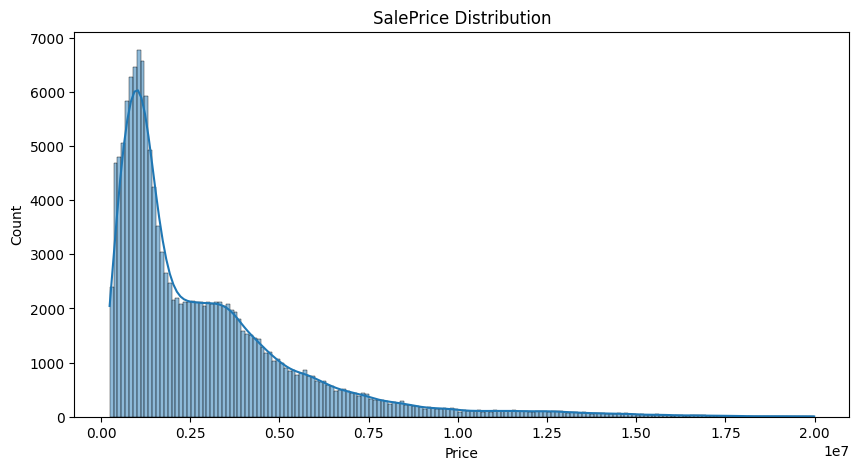

In [16]:
# Distribution of SalePrice
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(train['Price'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

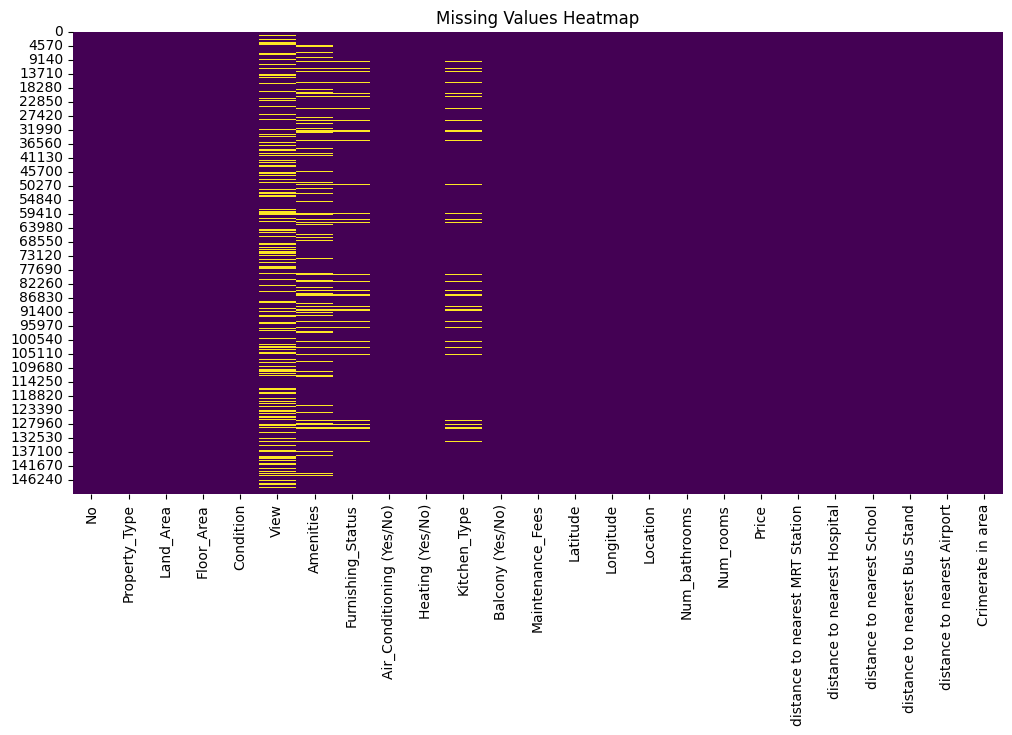

In [17]:
#2. Missing Values Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [18]:
# Skewness and kurtosis
print("Skewness:", train['Price'].skew())  # >1 = right-skewed
print("Kurtosis:", train['Price'].kurt())   # >3 = heavy-tailed

Skewness: 2.077561321904275
Kurtosis: 5.517177692268597


In [19]:
# Correlation with target
import matplotlib.pyplot as plt
import seaborn as sns
corr = train.corr(numeric_only=True)['Price'].sort_values(ascending=False)
corr



,Price
Price,1.000000
Floor_Area,0.448256
Maintenance_Fees,0.422791
Land_Area,0.392029
Num_bathrooms,0.352634
Num_rooms,0.350562
Latitude,0.035094
distance to nearest School,0.000760
distance to nearest MRT Station,0.000706
distance to nearest Airport,-0.000002


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

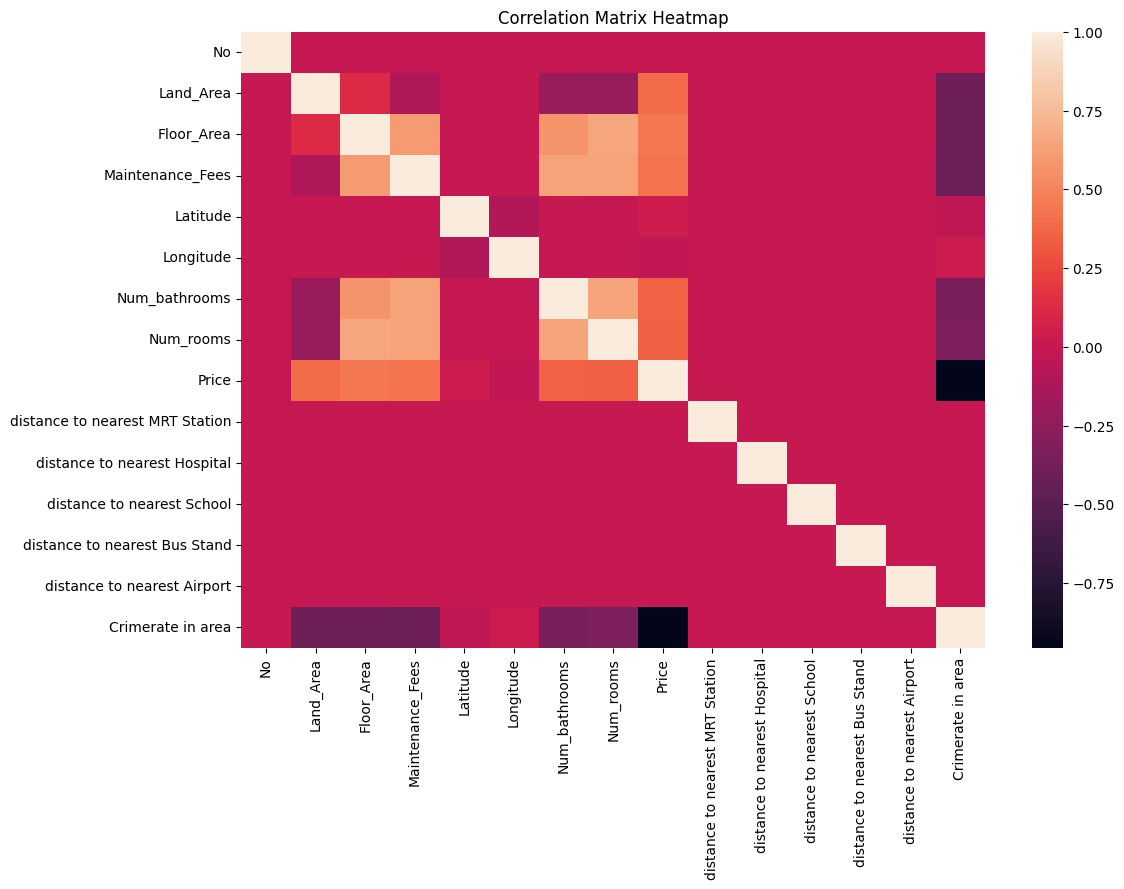

In [20]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(numeric_only=True))
plt.title("Correlation Matrix Heatmap")

In [21]:
# Selecting key features for pairplot
key_features = [
    'Price',
    'Floor_Area',
    'Land_Area',
    'Num_rooms',
    'Num_bathrooms',
    'Maintenance_Fees',
    'distance to nearest MRT Station',
    'Crimerate in area'
]

In [22]:

# # Create the pair plot
# sns.pairplot(train)
# plt.suptitle("Pair Plot of Important Features", y=1.02)
# plt.show()
#take a lot of time

Text(0, 0.5, 'Frequency')

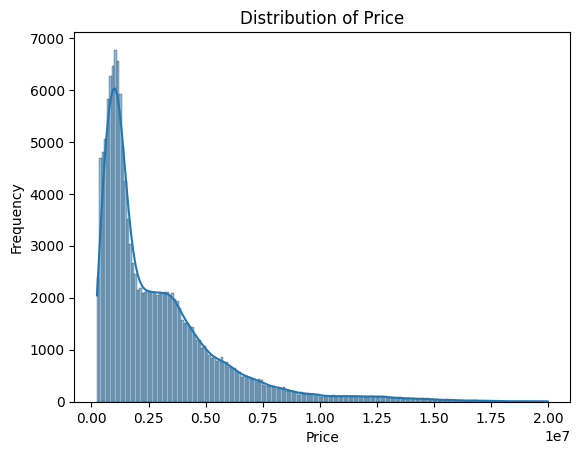

In [23]:

sns.histplot(train['Price'], kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")


Text(0.5, 1.0, 'Boxplot of Price')

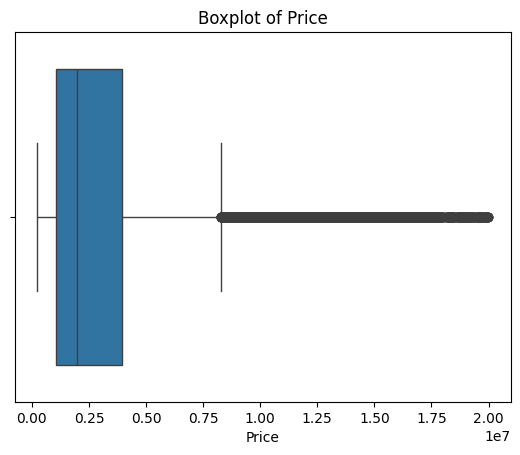

In [24]:
#Boxplots for Outliers
sns.boxplot(x=train['Price'])
plt.title("Boxplot of Price")



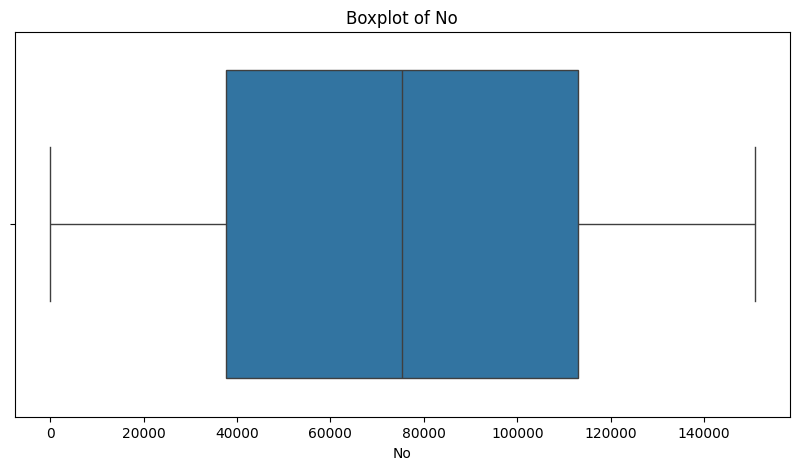

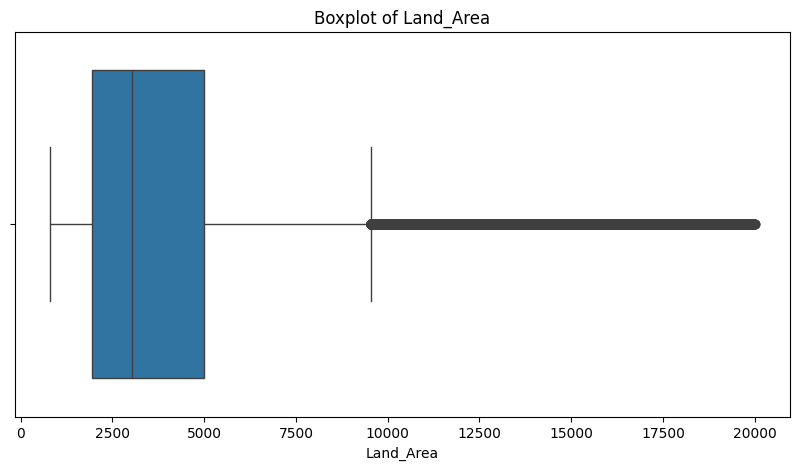

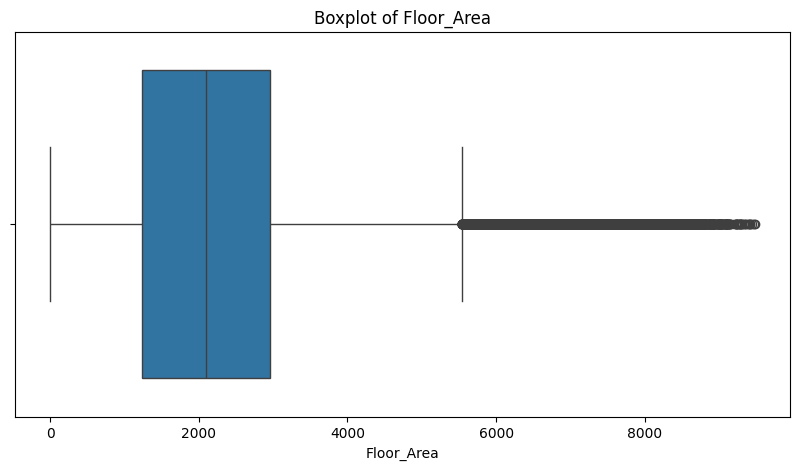

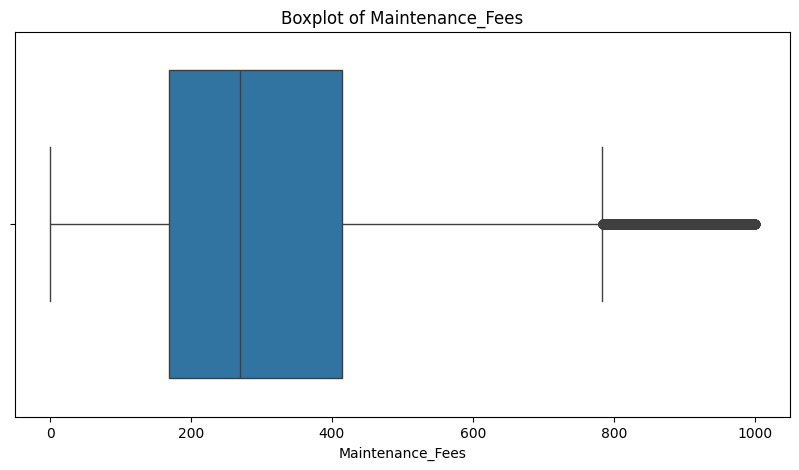

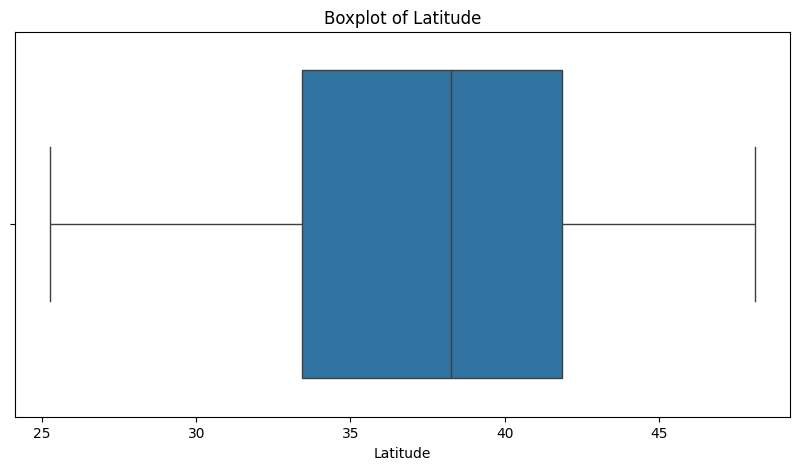

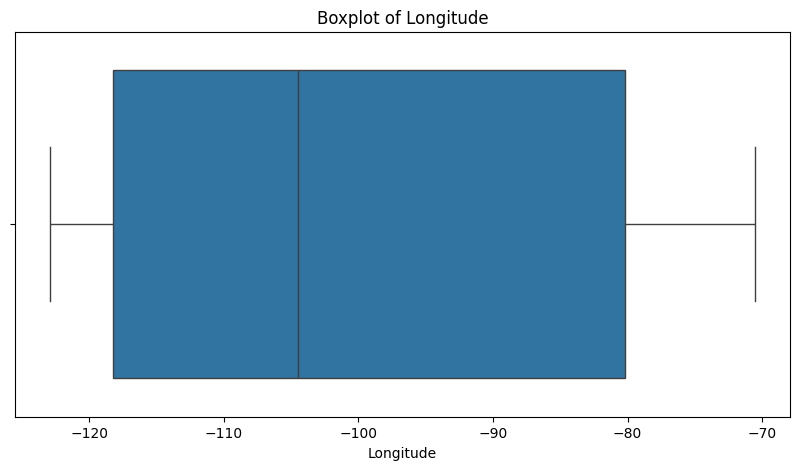

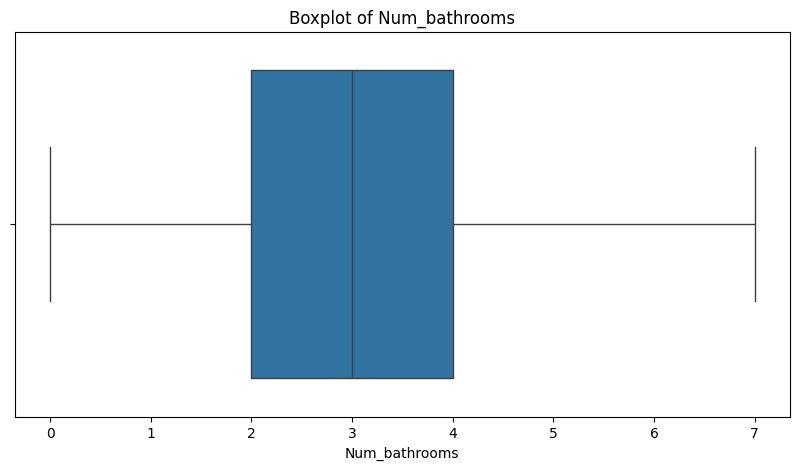

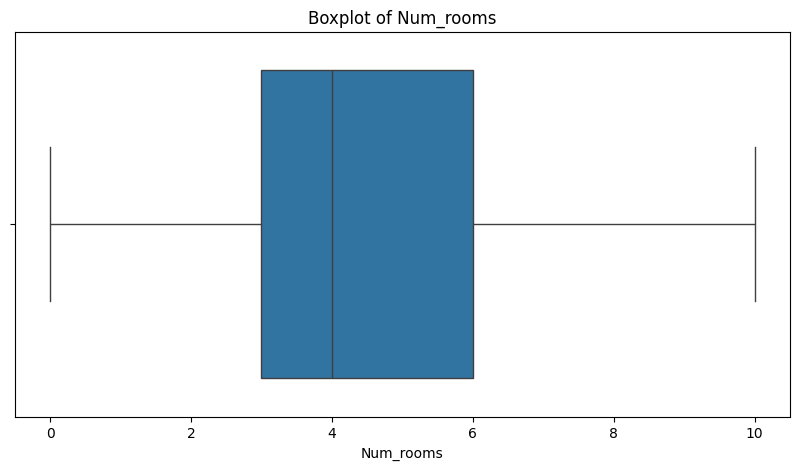

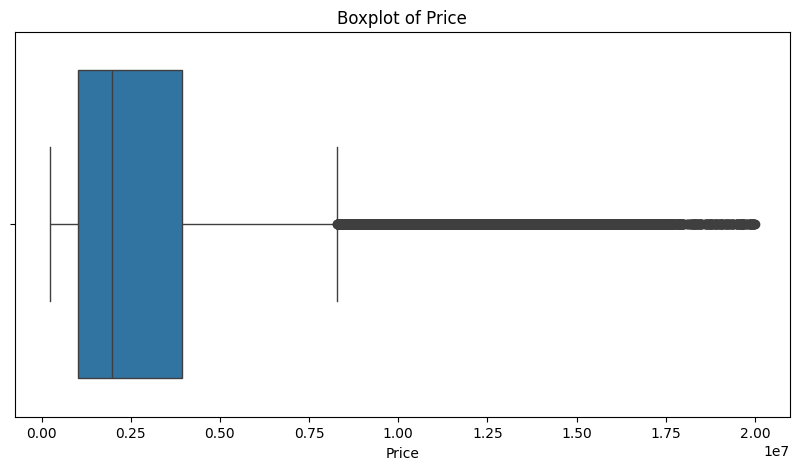

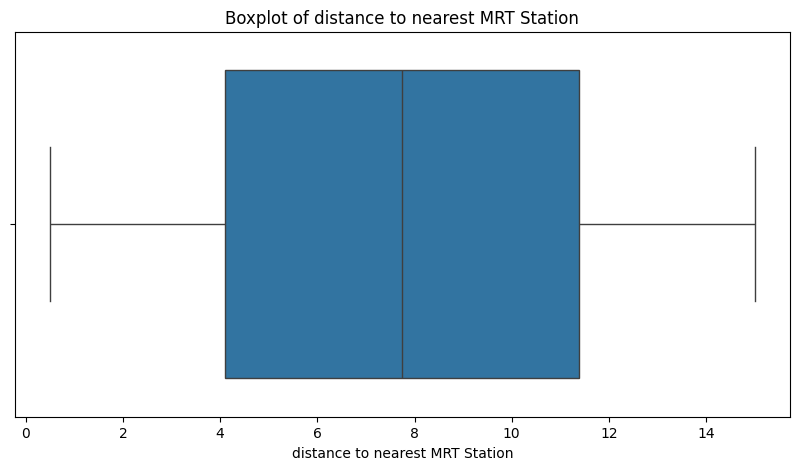

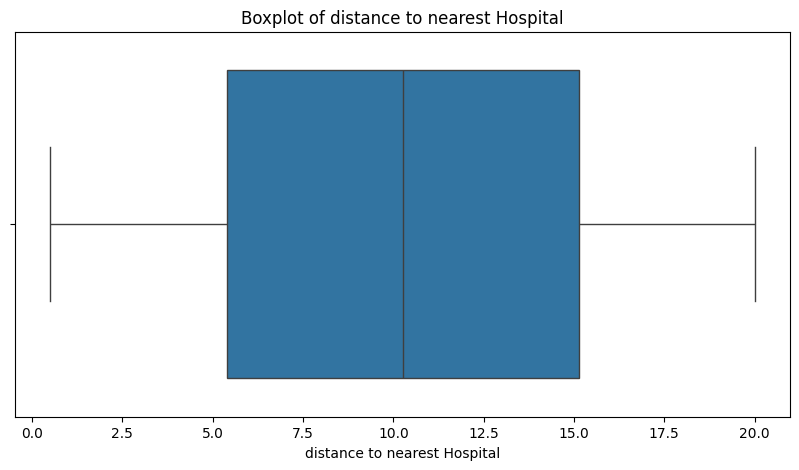

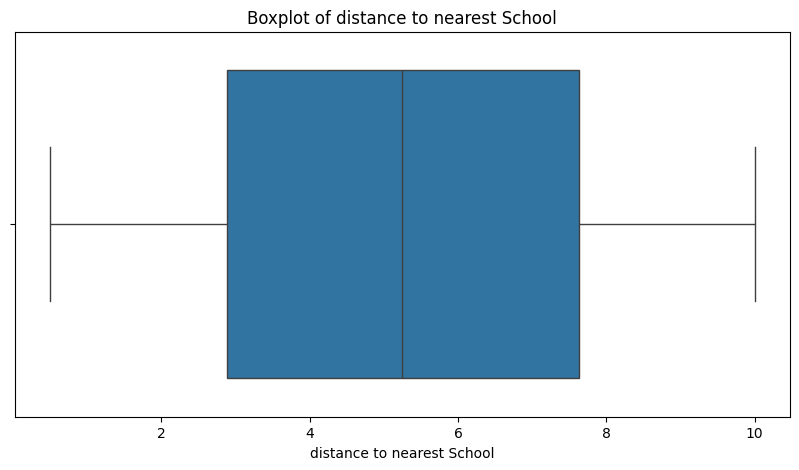

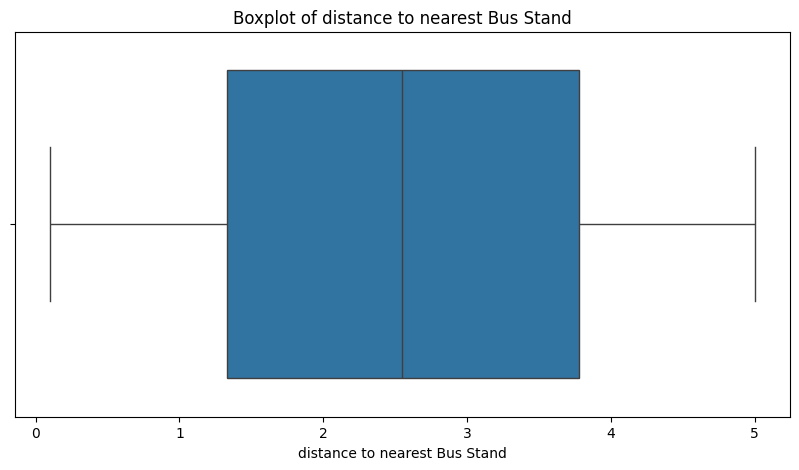

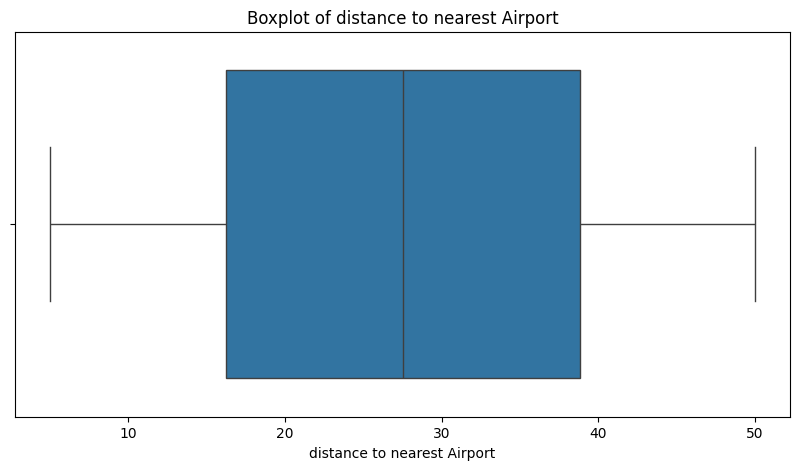

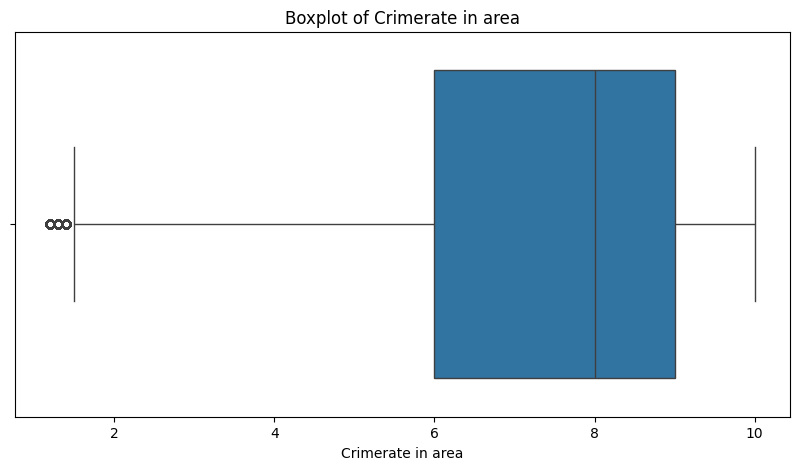

In [25]:
# Boxplot for numeric features
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplot for each numeric feature
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

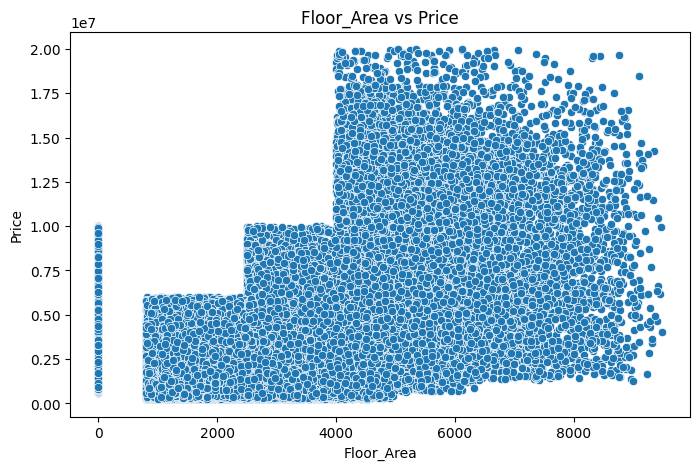

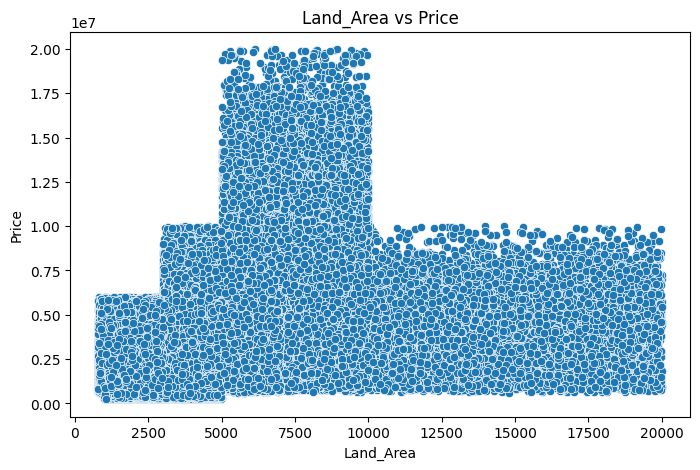

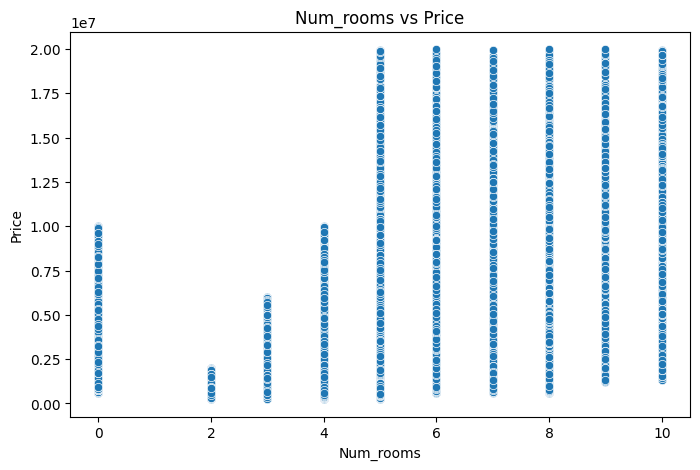

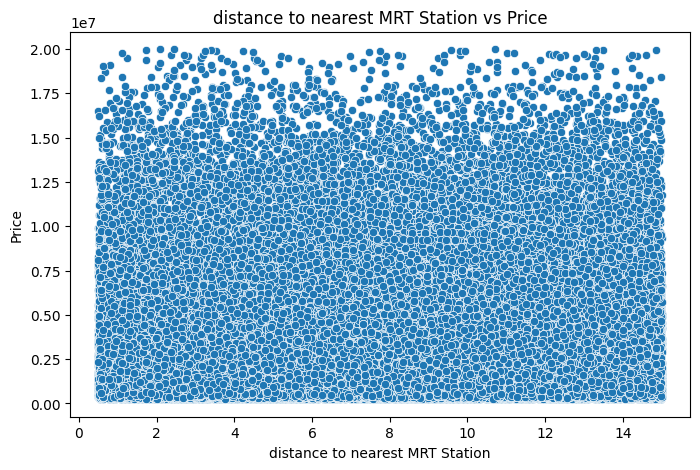

In [26]:
important_features = ['Floor_Area', 'Land_Area', 'Num_rooms', 'distance to nearest MRT Station']

for feature in important_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=train[feature], y=train['Price'])
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

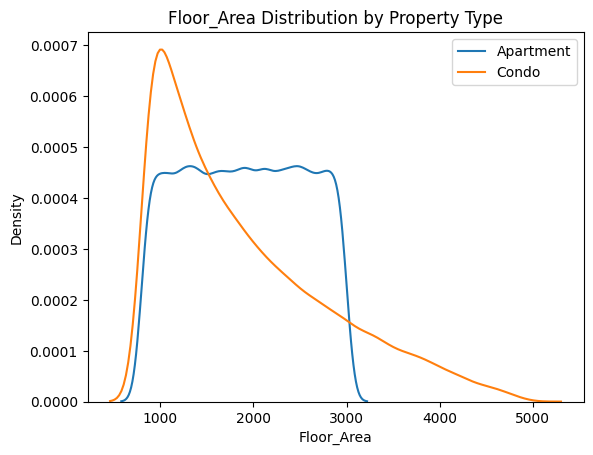

In [27]:
# Pick top 2 most frequent property types for comparison
top_types = train['Property_Type'].value_counts().index[:2]

# KDE plots for top property types
for property_type in top_types:
    sns.kdeplot(train[train['Property_Type'] == property_type]['Floor_Area'], label=property_type)

plt.title("Floor_Area Distribution by Property Type")
plt.xlabel("Floor_Area")
plt.ylabel("Density")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Property Type Distribution')

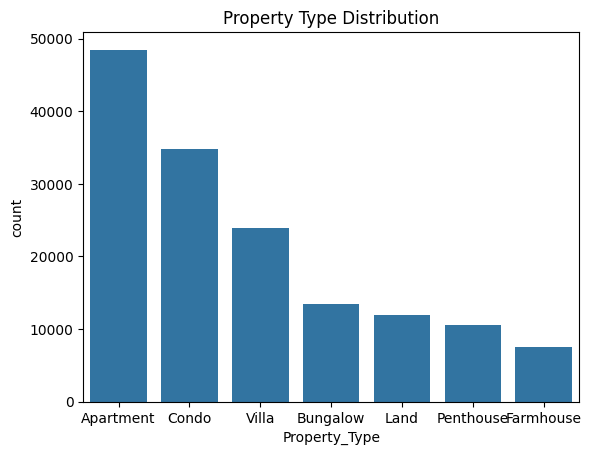

In [28]:
#count plot
sns.countplot(x='Property_Type', data=train, order=train['Property_Type'].value_counts().index)
plt.title("Property Type Distribution")



### **3. Data Preprocessing**
- **Missing Data**:  
  - Drop columns/rows with excessive nulls.  
  - Impute: **Median** (numeric), **Mode** (categorical).  
- **Categorical Encoding**:  
  - **One-Hot** (nominal), **Label** (ordinal).  
- **Feature Scaling**:  
  - **StandardScaler** (SVM, KNN), **MinMaxScaler** (neural nets).  
- **Feature Engineering**:  
  - Create new features.  
  - Transform skewed data (log/power transforms).  
- **Train-Test Split**:  
  ```python
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  ```

In [29]:
# Import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [30]:
#Drop columns with excessive nulls
null_thresh = 0.5
train = train.loc[:, train.isnull().mean() < null_thresh]


In [31]:
#Impute missing values
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train.select_dtypes(include=['object']).columns


In [32]:
# Impute numeric columns with median
num_imputer = SimpleImputer(strategy='median')
train[numeric_cols] = num_imputer.fit_transform(train[numeric_cols])


In [33]:
# Impute categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])


In [34]:
#Label Encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le


In [35]:
#Feature Engineering(Create a new feature: Price per square foot)

if 'Price' in train.columns and 'Floor_Area' in train.columns:
    train['Price_per_sqft'] = train['Price'] / (train['Floor_Area'] + 1)  # Avoid division by zero

In [36]:
#Feature Scaling
scaler = StandardScaler()
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

In [37]:
#Step 7: Train-Test Split
X = train.drop('Price', axis=1)
y = train['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **4. Model Selection and Model Training **
- **Baseline Models**:  
  - **Regression**: Linear Regression, Random Forest.  
  - **Classification**: Logistic Regression, SVM, Random Forest.  
- **Advanced Models**:  
  - Gradient Boosted Trees (XGBoost, LightGBM).  
  - Neural Networks (for complex patterns).  

- **Fit Model**:  Using
  ```python
  model.fit(X_train, y_train)
  ```

linear regression model

In [38]:
#importing libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [41]:
print("RMSE value:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

RMSE value: 0.2619857551290605
R² Score: 0.5799345149497548


random forest

In [44]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)

# print("RMSE value:", mean_squared_error(y_test, y_pred_rf))
# print("R² Score:", r2_score(y_test, y_pred_rf))

logistic_regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Convert Price to binary (1 if above median, else 0)
y_class = (train['Price'] > train['Price'].median()).astype(int)

# Redefine X to ensure it has the same number of samples as y_class
X = train.drop('Price', axis=1)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_cls, y_train_cls)

y_pred_logreg = logistic_model.predict(X_test_cls)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **5. Model Evaluation**
  - **Accuracy**, **Precision**, **Recall** , F1 score , confuse matrix and classification report

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test_cls, y_pred_logreg))
print("Precision:", precision_score(y_test_cls, y_pred_logreg))
print("Recall:", recall_score(y_test_cls, y_pred_logreg))
print("F1 Score:", f1_score(y_test_cls, y_pred_logreg))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_logreg))

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_logreg))


Accuracy: 0.9641590132953152
Precision: 0.9688438188004537
Recall: 0.9594344608879493
F1 Score: 0.9641161825726141

Confusion Matrix:
 [[14558   467]
 [  614 14522]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     15025
           1       0.97      0.96      0.96     15136

    accuracy                           0.96     30161
   macro avg       0.96      0.96      0.96     30161
weighted avg       0.96      0.96      0.96     30161



### **7. Deployment**
- **Save Model**:  
  ```python
  import pickle
  ```
- **Deploy**:  
  - using flask

In [47]:
#saving the models
import pickle

# Save Linear Regression model
with open('linear_model_pickle.pkl', 'wb') as f:
    pickle.dump(lr, f)

# # Save Random Forest model
# with open('random_forest_model_pickle.pkl', 'wb') as f:
#     pickle.dump(rf, f)

# Save Logistic Regression model
with open('logistic_model_pickle.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)


In [ ]:
#opening the models
with open('linear_model_pickle.pkl', 'rb') as f:
    linear_model = pickle.load(f)

# with open('random_forest_model_pickle.pkl', 'rb') as f:
#     rf_model = pickle.load(f)

with open('logistic_model_pickle.pkl', 'rb') as f:
    logistic_model = pickle.load(f)


In [ ]:
import pickle
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import matplotlib.pyplot as plt

# Load the models
with open('logistic_model_pickle.pkl', 'rb') as f:
    log_model = pickle.load(f)

with open('linear_model_pickle.pkl', 'rb') as f:
    linear_model = pickle.load(f)

# Define all possible features (corrected version)
all_features = [
    'Property_Type', 'Land_Area', 'Floor_Area', 'Condition', 'View',
    'Amenities', 'Furnishing_Status', 'Air_Conditioning (Yes/No)',
    'Heating (Yes/No)', 'Kitchen_Type', 'Balcony (Yes/No)',
    'Maintenance_Fees', 'Price_per_sqft', 'Num_bathrooms', 'Num_rooms',
    'distance to nearest MRT Station', 'distance to nearest School'
]

# Get feature importance properly
try:
    # For linear regression
    coefficients = linear_model.coef_[0]
    feature_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': coefficients
    }).sort_values('Importance', key=abs, ascending=False)

    top_10_features = feature_importance.head(10)['Feature'].tolist()
    print("Selected top 10 features:", top_10_features)

except Exception as e:
    print("Couldn't get feature importance automatically. Using default features.")
    top_10_features = [
        'Floor_Area', 'Price_per_sqft', 'Num_bathrooms',
        'Property_Type', 'Condition', 'View',
        'distance to nearest MRT Station', 'Amenities',
        'Num_rooms', 'Maintenance_Fees'
    ]

# Define value ranges for numeric features
numeric_ranges = {
    'Land_Area': (0, 10000, 100),
    'Floor_Area': (0, 10000, 100),
    'Maintenance_Fees': (0, 5000, 50),
    'Price_per_sqft': (0, 10000, 10),
    'Num_bathrooms': (0, 10, 1),
    'Num_rooms': (0, 20, 1),
    'distance to nearest MRT Station': (0, 50, 0.1),
    'distance to nearest School': (0, 50, 0.1)
}

# Categorical features with their options
categorical_features = {
    'Property_Type': ['Apartment', 'House', 'Condo', 'Townhouse'],
    'Condition': ['New', 'Good', 'Fair', 'Poor'],
    'View': ['None', 'Garden', 'City', 'Water', 'Mountain'],
    'Amenities': ['Basic', 'Standard', 'Premium'],
    'Furnishing_Status': ['Unfurnished', 'Semi-Furnished', 'Fully-Furnished'],
    'Air_Conditioning (Yes/No)': ['Yes', 'No'],
    'Heating (Yes/No)': ['Yes', 'No'],
    'Kitchen_Type': ['Standard', 'Modern', 'Luxury'],
    'Balcony (Yes/No)': ['Yes', 'No']
}

# Create input widgets only for top 10 features
input_widgets = {}
for feature in top_10_features:
    if feature in categorical_features:
        input_widgets[feature] = widgets.Dropdown(
            options=categorical_features[feature],
            description=f"{feature}:",
            style={'description_width': 'initial'}
        )
    elif feature in numeric_ranges:
        min_val, max_val, step = numeric_ranges[feature]
        input_widgets[feature] = widgets.FloatText(
            value=min_val,
            min=min_val,
            max=max_val,
            step=step,
            description=f"{feature}:",
            style={'description_width': 'initial'}
        )
    else:
        print(f"Warning: Feature {feature} not found in either categorical or numeric features")

# Model selection and prediction button
model_toggle = widgets.ToggleButtons(
    options=['Logistic Regression', 'Linear Regression'],
    description='Model:',
    disabled=False
)

predict_button = widgets.Button(
    description='Predict',
    button_style='success'
)

output = widgets.Output()

def make_prediction(b):
    with output:
        clear_output()
        try:
            # Gather input values
            input_values = {}
            for feature in top_10_features:
                widget = input_widgets.get(feature)
                if not widget:
                    continue

                if feature in categorical_features:
                    input_values[feature] = categorical_features[feature].index(widget.value)
                else:
                    input_values[feature] = widget.value

            # Create input array in correct order
            input_array = np.array([[input_values[feature] for feature in top_10_features]])

            # Make prediction
            selected_model = model_toggle.value
            if selected_model == 'Logistic Regression':
                prediction = log_model.predict(input_array)
            else:
                prediction = linear_model.predict(input_array)

            display(HTML(f"<h2>Predicted Price: ${prediction[0]:,.2f}</h2>"))

            # Show input summary
            display(HTML("<h3>Input Summary:</h3>"))
            summary = pd.DataFrame({
                'Feature': top_10_features,
                'Value': [input_widgets[f].value for f in top_10_features]
            })
            display(summary)

        except Exception as e:
            display(HTML(f"<p style='color:red'>Error: {str(e)}</p>"))

predict_button.on_click(make_prediction)

# Create and display form
form = widgets.VBox(
    [model_toggle] +
    [input_widgets[f] for f in top_10_features if f in input_widgets] +
    [predict_button, output]
)
display(form)

#website

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the models
@st.cache_resource
def load_models():
    models = {
        'Linear Regression': pickle.load(open('models/linear_model_pickle.pkl', 'rb')),
        'Logistic Regression': pickle.load(open('models/logistic_model_pickle.pkl', 'rb')),
        'Random Forest': pickle.load(open('models/random_forest_model_pickle.pkl', 'rb'))
    }
    return models

models = load_models()

# App title and description
st.title('🏠 House Price Prediction')
st.write("""
This app predicts house prices based on various features using different machine learning models.
""")

# Sidebar for user inputs
st.sidebar.header('User Input Features')

# Collect user inputs
def get_user_input():
    # Property details
    property_type = st.sidebar.selectbox('Property Type', ['Apartment', 'House', 'Condo', 'Townhouse'])
    land_area = st.sidebar.number_input('Land Area (sqft)', min_value=100, max_value=50000, value=2000)
    floor_area = st.sidebar.number_input('Floor Area (sqft)', min_value=100, max_value=10000, value=1500)
    condition = st.sidebar.selectbox('Condition', ['New', 'Good', 'Fair', 'Poor'])

    # Location details
    latitude = st.sidebar.number_input('Latitude', value=37.77)
    longitude = st.sidebar.number_input('Longitude', value=-122.42)
    mrt_distance = st.sidebar.number_input('Distance to MRT Station (km)', min_value=0.1, max_value=50.0, value=2.0)
    crime_rate = st.sidebar.slider('Crime Rate in Area (1-10)', 1, 10, 5)

    # Room details
    num_rooms = st.sidebar.slider('Number of Rooms', 1, 10, 3)
    num_bathrooms = st.sidebar.slider('Number of Bathrooms', 1, 5, 2)

    # Create a dictionary of features
    data = {
        'Property_Type': property_type,
        'Land_Area': land_area,
        'Floor_Area': floor_area,
        'Condition': condition,
        'Latitude': latitude,
        'Longitude': longitude,
        'distance to nearest MRT Station': mrt_distance,
        'Crimerate in area': crime_rate,
        'Num_rooms': num_rooms,
        'Num_bathrooms': num_bathrooms,
        'Price_per_sqft': floor_area / land_area if land_area > 0 else 0
    }

    # Convert to DataFrame
    features = pd.DataFrame(data, index=[0])
    return features

user_input = get_user_input()

# Display user inputs
st.subheader('User Input Features')
st.write(user_input)

# Model selection
model_name = st.selectbox('Select Model', list(models.keys()))

# Preprocess function (similar to what you did in the notebook)
def preprocess_input(input_df):
    # Convert categorical to numerical (simple encoding for demo)
    categorical_map = {
        'Property_Type': {'Apartment': 0, 'House': 1, 'Condo': 2, 'Townhouse': 3},
        'Condition': {'Poor': 0, 'Fair': 1, 'Good': 2, 'New': 3}
    }

    for col, mapping in categorical_map.items():
        if col in input_df.columns:
            input_df[col] = input_df[col].map(mapping)

    # Add any other preprocessing steps you had in your notebook
    return input_df

# Prediction
if st.button('Predict Price'):
    # Preprocess the input
    processed_input = preprocess_input(user_input.copy())

    # Get the selected model
    model = models[model_name]

    try:
        # Make prediction
        prediction = model.predict(processed_input)

        # Display results
        st.subheader('Prediction')
        if model_name == 'Logistic Regression':
            # For classification (above/below median)
            result = 'Above Median Price' if prediction[0] == 1 else 'Below Median Price'
            st.success(f'Prediction: {result}')
        else:
            # For regression (actual price)
            formatted_price = "${:,.2f}".format(prediction[0])
            st.success(f'Predicted Price: {formatted_price}')

            # Show feature importance if available
            if model_name == 'Random Forest':
                try:
                    st.subheader('Feature Importance')
                    importances = model.feature_importances_
                    indices = np.argsort(importances)[::-1]

                    fig, ax = plt.subplots(figsize=(10, 6))
                    ax.set_title("Feature Importances")
                    ax.bar(range(processed_input.shape[1]), importances[indices], align="center")
                    ax.set_xticks(range(processed_input.shape[1]))
                    ax.set_xticklabels(processed_input.columns[indices], rotation=90)
                    st.pyplot(fig)
                except:
                    pass

    except Exception as e:
        st.error(f"Error making prediction: {str(e)}")

# Add some visualizations (optional)
st.subheader('Data Distributions')
if st.checkbox('Show Price Distribution'):
    # Load some sample data (or use your training data)
    # In a real app, you might want to load this from a file
    sample_prices = np.random.normal(300000, 100000, 1000)

    fig, ax = plt.subplots()
    sns.histplot(sample_prices, kde=True, ax=ax)
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')
    st.pyplot(fig)


## **8. Monitoring & Maintenance**
- **Track Performance**: Log predictions and monitor drift.  
- **Retrain**: Schedule periodic updates with fresh data.  